# Assignment 6: Empirical Exercise 6: How have wages changed for typical Americans?

How have wages changed for typical Americans?

In this exercise, we will examine the median annual earnings
of men and women in the United States since the 1960s.

You will need to download data from cps.ipums.org from the March CPS Supplement (now
known as the Annual Social and Economic supplement) and, to adjust for inflation, the
PCE deflator from FRED.

Specifically, the goal is to produce four data series: 

1. the average earnings of full-time workers;
2. the median earnings of full-time workers;
3. the median earnings of all workers; and
4. the median earnings in the selected population.

You may choose the population to analyze: men, women, or both.

## Things to keep in mind:

* Earnings are the combination of wages, business income, and farm income.
* Earnings data in the CPS can be top coded.
* You need to merge in the PCE data to the ASEC.
* You should drop individuals who have missing wage, business, or farm income data.

Please produce a graph showing the four data series and describe whether and why they are telling the same economic story. 

In [105]:
# First: Import & clean the CPS data.

import pandas as pd
import numpy as np

cps = pd.read_stata("data/cps.dta")

In [106]:
# Replace top-coded earnings with NaN, and drop all NaN wages from the dataset

wage_cols = [
    "incwage",
    "incbus",
    "incfarm"
]

cps["wages"] = cps[wage_cols].sum(axis=1)
wage_cols.append("wages")

cps.drop(cps[cps["wages"] > 99999996].index, axis=0, inplace=True)

for col in wage_cols:
    cps.drop(cps[cps[col].isna()].index, axis=0, inplace=True)

In [107]:
# Categorize part time vs full time employees

def cat(hours):
    if hours in range(0, 20):
        return "part-time"
    elif hours < 99:
        return "full-time"
    else:
        return None

cps["hour_cat"] = cps["uhrsworkly"].apply(cat)

In [108]:
# 1. The average earnings of full-time workers
agg_df = pd.DataFrame(cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].mean())

agg_df.rename({"wages": "ft_avg_wages"},axis=1,inplace=True)

In [109]:
# 1. The average earnings of full-time workers
agg_df["ft_med_wages"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].median()

In [110]:
agg_df["all_avg_wages"] = cps[cps["wages"] != 0].groupby([
    "year"
])["wages"].mean()

agg_df["all_med_wages"] = cps[cps["wages"] != 0].groupby([
    "year"
])["wages"].median()

In [111]:
agg_df["bus_med_wages"] = cps[cps["incbus"] != 0].groupby([
    "year"
])["wages"].median()

agg_df["nonbus_med_wages"] = cps[cps["incbus"] == 0].groupby([
    "year"
])["wages"].median()

agg_df["bus_avg_wages"] = cps[cps["incbus"] != 0].groupby([
    "year"
])["wages"].mean()

agg_df["nonbus_avg_wages"] = cps[cps["incbus"] == 0].groupby([
    "year"
])["wages"].mean()


In [136]:
agg_df["ft_topquint_wages"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].quantile(0.8)

agg_df["ft_botquint_wages"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].quantile(0.2)

agg_df["ft_topdec_wages"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].quantile(0.9)

agg_df["ft_botdec_wages"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])["wages"].quantile(0.1)

agg_df["all_topquint_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.8)

agg_df["all_botquint_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.2)

agg_df["all_topdec_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.9)

agg_df["all_botdec_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.1)

agg_df["all_topperc_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.99)

agg_df["all_botperc_wages"] = cps[cps["wages"] > 0].groupby([
    "year"
])["wages"].quantile(0.01)

agg_df

,ft_avg_wages,ft_med_wages,all_avg_wages,all_med_wages,bus_med_wages,nonbus_med_wages,bus_avg_wages,nonbus_avg_wages,ft_topquint_wages,ft_botquint_wages,ft_topdec_wages,ft_botdec_wages,all_topquint_wages,all_botquint_wages,all_topdec_wages,all_botdec_wages,all_topperc_wages,all_botperc_wages,pce_adj
year,,,,,,,,,,,,,,,,,,,
1976,8692.726796,7200.0,7995.126995,6400.0,7500.0,1400.0,10508.142332,4784.187189,13700.0,2334.8,17500.0,900.0,13000.0,1583.8,17000.0,560.0,36068.45,40.00,0.090168
1977,9178.996381,7571.5,8448.782276,6679.5,7517.0,1650.0,10888.464228,5170.870437,14553.0,2400.0,18840.0,912.0,14000.0,1600.0,18000.0,588.0,40000.00,40.00,0.101000
1978,9881.644046,8000.0,9111.743759,7200.0,8500.0,2000.0,11829.873975,5607.766061,15500.0,2600.0,20000.0,1000.0,15000.0,1800.0,20000.0,624.0,42394.60,40.00,0.112460
1979,10740.480120,9000.0,9939.195782,8000.0,9000.0,2400.0,12579.671347,6237.416430,17000.0,3000.0,22000.0,1150.0,16000.0,2000.0,21071.2,750.0,47500.00,50.00,0.124973
1980,11660.976127,9780.0,10838.638211,8798.0,9150.0,3200.0,12430.660760,7092.712670,18300.4,3300.0,24000.0,1350.0,18000.0,2400.0,23200.0,900.0,50000.00,50.00,0.134226
1981,12583.633947,10278.0,11695.727866,9566.0,9013.0,3500.0,12749.893573,7635.057639,20000.0,3730.6,25672.0,1500.0,19180.2,2720.0,25000.0,1000.0,50000.00,55.00,0.145888
1982,13817.455623,11100.0,12808.532069,10000.0,10000.0,3500.0,14116.766657,8272.065912,21715.0,4000.0,28000.0,1610.0,20800.0,3000.0,27500.0,1035.7,58000.00,50.00,0.161546
1983,14608.793152,12000.0,13520.923771,10500.0,9000.0,3424.0,14167.433566,8615.679382,23000.0,4100.0,30000.0,1700.0,22000.0,3000.0,29500.0,1025.0,63880.94,50.74,0.174302
1984,15407.292018,12400.0,14255.019359,11028.0,10000.0,3597.0,15729.267654,9059.574039,24000.0,4434.8,31609.6,1800.0,23000.0,3000.0,30000.0,1080.0,67000.00,50.00,0.189737


In [113]:
# Time to get PCE figured out!

pce_df = pd.read_csv("data/PCE.csv")
pce_df["YEAR"] = pd.to_datetime(pce_df["DATE"]).dt.year
pce_df = pce_df.groupby(["YEAR"]).max()

In [114]:
pce_array = pce_df[pce_df.index > agg_df.index.min()]["PCE"].to_numpy()


bench = pce_array[0]
for i in range(len(pce_array)):
    pce_array[i] = pce_array[i] / bench
    
pce_array

agg_df["pce_adj"] = pce_array

In [115]:
agg_adj_df = pd.DataFrame(index = agg_df.index)

for col in agg_df.columns[0:-1]:
    agg_adj_df[col] = agg_df[col] / agg_df["pce_adj"]
    
adj_df = agg_adj_df

In [132]:
adj_df["ft_count"] = cps[cps["hour_cat"] == "full-time"].groupby([
    "year"
])[cps.columns[0]].count()

adj_df["pt_count"] = cps[cps["hour_cat"] == "part-time"].groupby([
    "year"
])[cps.columns[0]].count()

adj_df["bus_count"] = cps[cps["incbus"] != 0].groupby([
    "year"
])[cps.columns[0]].count()

adj_df["nonbus_count"] = cps[cps["incbus"] == 0].groupby([
    "year"
])[cps.columns[0]].count()

adj_df["all_count"] = cps.groupby([
    "year"
])[cps.columns[0]].count()

In [133]:
adj_df["ft_quint_mult"] = adj_df["ft_topquint_wages"] / adj_df["ft_botquint_wages"]
adj_df["ft_dec_mult"] = adj_df["ft_topdec_wages"] / adj_df["ft_botdec_wages"]
adj_df["all_quint_mult"] = adj_df["all_topquint_wages"] / adj_df["all_botquint_wages"]
adj_df["all_dec_mult"] = adj_df["all_topdec_wages"] / adj_df["all_botdec_wages"]
adj_df["all_perc_mult"] = adj_df["all_topperc_wages"] / adj_df["all_botperc_wages"]

In [134]:
adj_df

,ft_avg_wages,ft_med_wages,all_avg_wages,all_med_wages,bus_med_wages,nonbus_med_wages,bus_avg_wages,nonbus_avg_wages,ft_topquint_wages,ft_botquint_wages,...,ft_quint_mult,ft_dec_mult,all_quint_mult,all_dec_mult,all_perc_mult,ft_count,pt_count,all_count,bus_count,nonbus_count
year,,,,,,,,,,,,,,,,,,,,,
1976,96405.983821,79851.017964,88669.309621,70978.682635,83178.143713,15526.586826,116539.703075,53058.641270,151938.742515,25893.910659,...,5.867740,19.444444,8.208107,30.357143,901.711250,57920,6583,102522,5171,97351
1977,90880.957958,74965.186235,83651.130785,66133.521951,74425.583428,16336.598730,107806.345985,51196.627526,144088.800802,23762.325426,...,6.063750,20.657895,8.750000,30.612245,1000.000000,70746,8210,122386,6751,115635
1978,87867.937045,71136.289984,81021.955791,64022.660985,75582.308108,17784.072496,105191.668194,49864.459088,137826.561844,23119.294245,...,5.961538,20.000000,8.333333,32.051282,1059.865000,70127,7885,119737,6951,112786
1979,85942.402033,72015.553275,79530.742599,64013.825134,72015.553275,19204.147540,100659.110231,49910.110576,136029.378409,24005.184425,...,5.666667,19.130435,8.000000,28.094933,950.000000,71203,7508,119317,6837,112480
1980,86875.679347,72862.180209,80749.162630,65546.161706,68168.604183,23840.386163,92609.922745,52841.565309,136340.188415,24585.398230,...,5.545576,17.777778,7.500000,25.777778,1000.000000,85035,8487,137553,8127,129426
1981,86255.175551,70451.087343,80168.976981,65570.646188,61780.078830,23990.932642,87394.810831,52334.901009,137091.043671,25571.592376,...,5.361068,17.114667,7.051544,25.000000,909.090909,84425,8420,137802,7733,130069
1982,85532.451737,68710.929144,79287.039586,61901.737968,61901.737968,21665.608289,87385.239059,51205.525655,134419.623997,24760.695187,...,5.428750,17.391304,6.933333,26.552090,1160.000000,75152,7753,123980,7264,116716
1983,83813.043591,68845.969178,77571.758433,60240.223031,51634.476884,19644.049872,81280.891216,49429.566433,131954.774258,23522.372803,...,5.609756,17.647059,7.333333,28.780488,1258.985810,74127,7694,124343,7609,116734
1984,81203.274061,65353.509053,75130.285221,58122.459503,52704.442784,18957.788070,82900.228712,47747.980158,126490.662683,23373.366286,...,5.411743,17.560889,7.666667,27.777778,1340.000000,73725,7508,123258,7562,115696


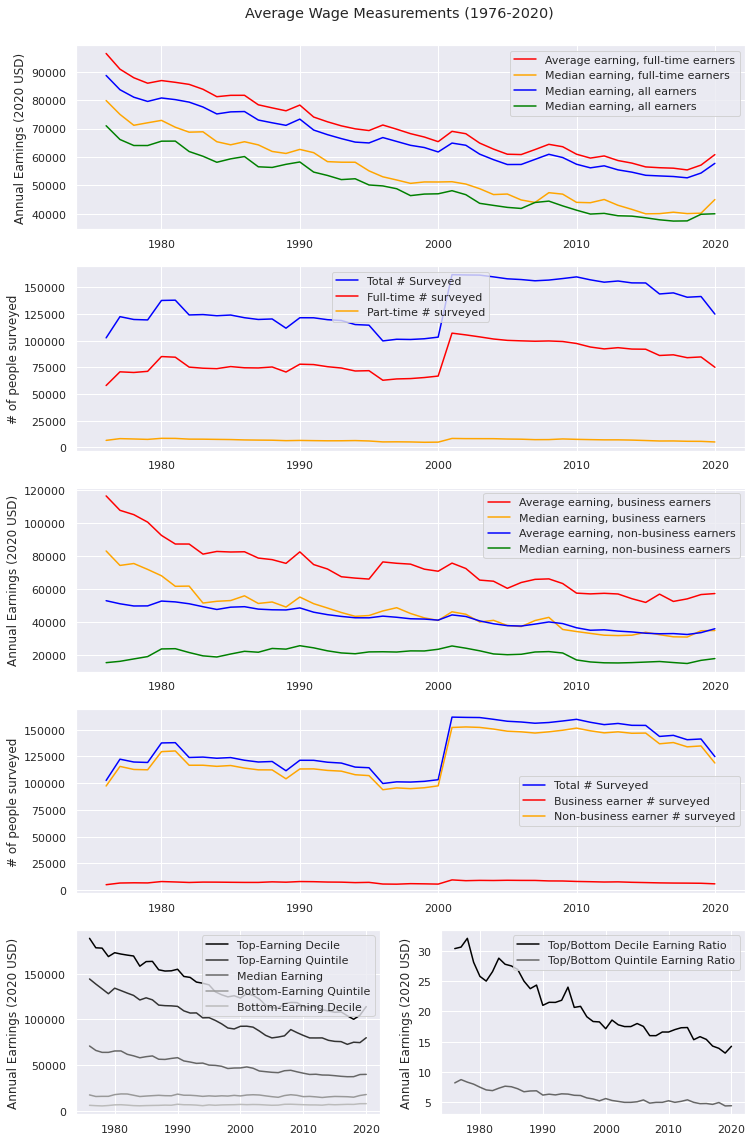

In [135]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set_theme()

# Setting up the plot surface
fig = plt.figure(figsize=(12, 18))
plt.suptitle("Average Wage Measurements (1976-2020)")
fig.subplots_adjust(top=0.95)
gs = GridSpec(nrows=5, ncols=2)

# The thing that the assigment actually asked for
ax0 = fig.add_subplot(gs[0,:])
ax0.plot(adj_df["ft_avg_wages"], color= "red",
         label="Average earning, full-time earners")
ax0.plot(adj_df["ft_med_wages"], color= "orange",
         label="Median earning, full-time earners")
ax0.plot(adj_df["all_avg_wages"], color= "blue",
         label="Median earning, all earners")
ax0.plot(adj_df["all_med_wages"], color= "green",
         label="Median earning, all earners")
ax0.legend()
ax0.set_ylabel("Annual Earnings (2020 USD)")

# Count of full and part-time employees surveyed
ax1 = fig.add_subplot(gs[1,:])
ax1.plot(adj_df["all_count"], color= "blue",
         label="Total # Surveyed")
ax1.plot(adj_df["ft_count"], color= "red",
         label="Full-time # surveyed")
ax1.plot(adj_df["pt_count"], color= "orange",
         label="Part-time # surveyed")
ax1.legend()
ax1.set_ylabel("# of people surveyed")

# Business vs non-business, avg
ax2 = fig.add_subplot(gs[2,:])
ax2.plot(adj_df["bus_avg_wages"], color= "red",
         label="Average earning, business earners")
ax2.plot(adj_df["bus_med_wages"], color= "orange",
         label="Median earning, business earners")
ax2.plot(adj_df["nonbus_avg_wages"], color= "blue",
         label="Average earning, non-business earners")
ax2.plot(adj_df["nonbus_med_wages"], color= "green",
         label="Median earning, non-business earners")
ax2.legend()
ax2.set_ylabel("Annual Earnings (2020 USD)")

# Count of full and part-time employees surveyed
ax2a = fig.add_subplot(gs[3,:])
ax2a.plot(adj_df["all_count"], color= "blue",
         label="Total # Surveyed")
ax2a.plot(adj_df["bus_count"], color= "red",
         label="Business earner # surveyed")
ax2a.plot(adj_df["nonbus_count"], color= "orange",
         label="Non-business earner # surveyed")
ax2a.legend()
ax2a.set_ylabel("# of people surveyed")

# Top vs bottom quantiles
ax3 = fig.add_subplot(gs[4,0])
ax3.plot(adj_df["all_topdec_wages"], color= "#000000",
         label="Top-Earning Decile")
ax3.plot(adj_df["all_topquint_wages"], color= "#333333",
         label="Top-Earning Quintile")
ax3.plot(adj_df["all_med_wages"], color= "#666666",
         label="Median Earning")
ax3.plot(adj_df["all_botquint_wages"], color= "#999999",
         label="Bottom-Earning Quintile")
ax3.plot(adj_df["all_botdec_wages"], color= "#BBBBBB",
         label="Bottom-Earning Decile")
ax3.legend()
ax3.set_ylabel("Annual Earnings (2020 USD)")


# Top vs bottom quantiles, multipliers
ax4 = fig.add_subplot(gs[4,1])
ax4.plot(adj_df["all_dec_mult"], color= "#000000",
         label="Top/Bottom Decile Earning Ratio")
ax4.plot(adj_df["all_quint_mult"], color= "#666666",
         label="Top/Bottom Quintile Earning Ratio")
ax4.legend()
ax4.set_ylabel("Annual Earnings (2020 USD)")

fig.show()
plt.savefig("output.png")